In [140]:
import pygad
import numpy

In [141]:
items = [{'przedmiot': 'zegar', 'wartosc': 100, 'waga': 7},
         {'przedmiot': 'obraz-pejzaż', 'wartosc': 300, 'waga': 7},
         {'przedmiot': 'obraz-portret', 'wartosc': 200, 'waga': 6},
         {'przedmiot': 'radio', 'wartosc': 40, 'waga': 2},
         {'przedmiot': 'laptop', 'wartosc': 500, 'waga': 5},
         {'przedmiot': 'lampka nocna', 'wartosc': 70, 'waga': 6},
         {'przedmiot': 'srebrne sztućce', 'wartosc': 100, 'waga': 1},
         {'przedmiot': 'porcelana', 'wartosc': 250, 'waga': 3},
         {'przedmiot': 'figura z brązu', 'wartosc': 300, 'waga': 10},
         {'przedmiot': 'skórzana torebka', 'wartosc': 280, 'waga': 3},
         {'przedmiot': 'odkurzacz', 'wartosc': 300, 'waga': 15}] 

In [142]:
gene_space = [0, 1]

def fitness_func(solution, solution_idx):
    wagi, wartosci = [], []
    
    for item in items:
        wagi.append(item["waga"])
        wartosci.append(item["wartosc"])
        
    suma_wagi = numpy.sum(solution * wagi)
    suma_wartosci = numpy.sum(solution * wartosci)

    if (suma_wagi > 25):
        return 0
    
    fitness = suma_wartosci
    return fitness


fitness_function = fitness_func

In [143]:
sol_per_pop = 10
num_genes = len(items)

In [144]:
# ile wylaniamy rodzicow do "rozmanazania" (okolo 50% populacji)
# ile pokolen
# ilu rodzicow zachowac (kilka procent)
num_parents_mating = 5
num_generations = 30
keep_parents = 2

# jaki typ selekcji rodzicow?
#sss = steady, rws=roulette, rank = rankingowa, tournament = turniejowa
parent_selection_type = "sss"

# w il =u punktach robic krzyzowanie?
crossover_type = "single_point"

# mutacja ma dzialac na ilu procent genow?
# trzeba pamietac ile genow ma chromosom
mutation_type = "random"
mutation_percent_genes = 8

c:\Users\Piotr Damrych\AppData\Local\Programs\Python\Python39\lib\site-packages\pygad\pygad.py:522: UserWarning: The percentage of genes to mutate (mutation_percent_genes=8) resutled in selecting (0) genes. The number of genes to mutate is set to 1 (mutation_num_genes=1).
If you do not want to mutate any gene, please set mutation_type=None.
  if not self.suppress_warnings: warnings.warn("The percentage of genes to mutate (mutation_percent_genes={mutation_percent}) resutled in selecting ({mutation_num}) genes. The number of genes to mutate is set to 1 (mutation_num_genes=1).\nIf you do not want to mutate any gene, please set mutation_type=None.".format(mutation_percent=mutation_percent_genes, mutation_num=mutation_num_genes))


Parameters of the best solution : [0. 1. 1. 0. 1. 0. 1. 1. 0. 1. 0.]
Fitness value of the best solution = 1630.0
Predicted output based on the best solution : ['obraz-pejzaż', 'obraz-portret', 'laptop', 'srebrne sztućce', 'porcelana', 'skórzana torebka']


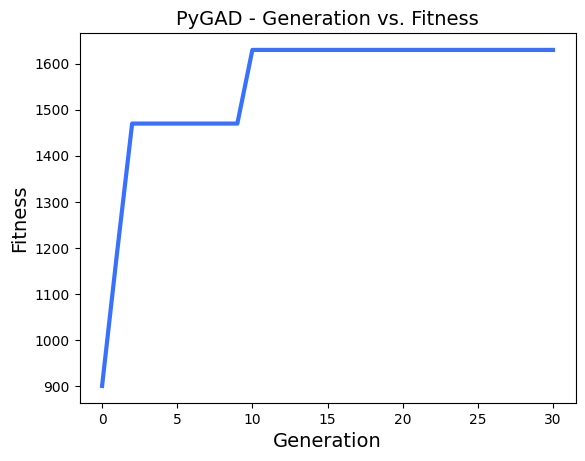

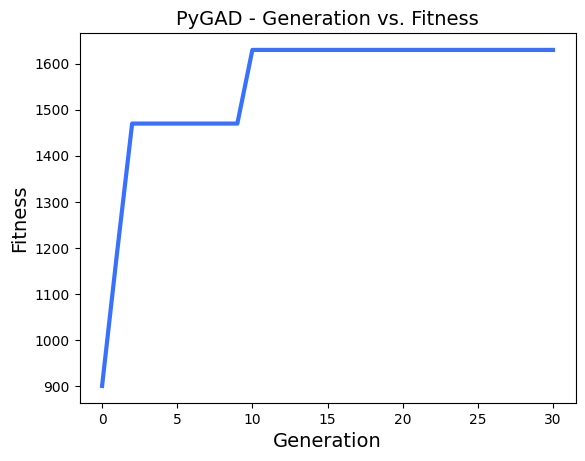

In [145]:
# inicjacja algorytmu z powyzszymi parametrami wpisanymi w atrybuty
ga_instance = pygad.GA(gene_space=gene_space,
                       num_generations=num_generations,
                       num_parents_mating=num_parents_mating,
                       fitness_func=fitness_function,
                       sol_per_pop=sol_per_pop,
                       num_genes=num_genes,
                       parent_selection_type=parent_selection_type,
                       keep_parents=keep_parents,
                       crossover_type=crossover_type,
                       mutation_type=mutation_type,
                       mutation_percent_genes=mutation_percent_genes)

# uruchomienie algorytmu
ga_instance.run()

# podsumowanie: najlepsze znalezione rozwiazanie (chromosom+ocena)
solution, solution_fitness, solution_idx = ga_instance.best_solution()
print("Parameters of the best solution : {solution}".format(solution=solution))
print("Fitness value of the best solution = {solution_fitness}".format(
    solution_fitness=solution_fitness))

# tutaj dodatkowo wyswietlamy sume wskazana przez jedynki
prediction = []
for item, item_from_sol in zip(items, solution):
    if item_from_sol:
        prediction.append(item["przedmiot"])
print("Predicted output based on the best solution : {prediction}".format(
    prediction=prediction))

# wyswietlenie wykresu: jak zmieniala sie ocena na przestrzeni pokolen
ga_instance.plot_fitness()